# 22 Identification algorithm

This example introduces a comprehensive experimental method to check the consistency of individual measurements based on comparisons with the complete experimental response model.  The numerical model is introduced only to enable the experimental model to be expanded using the System Equivalent Model Mixing method. The entire formulation is developed in the frequency domain.

In [1]:
import pyFBS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Data import

Importing of example data: 
 - 3D model in stl format
 - locations and directions of responses and impacts in xlsx format
 - Ansys .full file
 - Ansys .res file
 - experimentally obtained FRFs stored in a pickle file

In [2]:
# pyFBS.download_lab_testbench()

In [3]:
stl = r"./lab_testbench/STL/AB.stl"
xlsx = r"./lab_testbench/Measurements/ammeasurements.xlsx"

full_file = r"./lab_testbench/FEM/AB.full"
rst_file = r"./lab_testbench/FEM/AB.rst"

exp_file = r"./lab_testbench/Measurements/Y_AB.p"

## Numerical model

In this showcase, a numerical model of the admittance matrix will be generated using the mode superposition method which is included in the pyFBS library.

In [ ]:
MK = pyFBS.MK_model(rst_file,full_file,no_modes = 100,recalculate = False, scale=1000)

[100]
[160]
[3]


### Show 3D model

In [5]:
view3D = pyFBS.display.view3D(show_origin= True)

In [6]:
view3D.add_stl(stl,name = "engine_mount",color = "#8FB1CC",opacity = .1);

In [7]:
view3D.plot.add_mesh(MK.mesh, scalars = np.ones(MK.mesh.points.shape[0]) ,name = "mesh",cmap = "coolwarm", show_edges = True);

##### Import and show impact locations

In [8]:
df_imp = pd.read_excel(xlsx, sheet_name='Impacts_AB')
view3D.show_imp(df_imp)
# view3D.label_imp(df_imp)
# df_imp

##### Import and show response locations

In [9]:
df_acc = pd.read_excel(xlsx, sheet_name='Sensors_B')
view3D.show_acc(df_acc,overwrite = True)
#view3D.label_imp(df_imp)
#df_imp

In [10]:
df_chn = pd.read_excel(xlsx, sheet_name='Channels_AB')
view3D.show_chn(df_chn)
# view3D.label_chn(df_chn)
# df_chn

##### Updated locations of responses and impacts to where nodes actually exist

In [11]:
df_chn_up = MK.update_locations_df(df_chn)
df_imp_up = MK.update_locations_df(df_imp)

In [12]:
# view3D.show_chn(df_chn_up, color = "k",overwrite = False)
# view3D.show_imp(df_imp_up, color = "k",overwrite = False)

### FRFs synthetization

For the SEMM method, the numerical model should include at least those DoFs that are also included in the experimental model, but additional other DoFs may also be included. In the presented case, the numerical admittance matrix will be generated only for locations where measurements were made. 

In [13]:
MK.FRF_synth(df_chn,df_imp, 
             f_start=0,
             f_end=2002.5,
             f_resolution=2.5,
             modal_damping = 0.003,
             frf_type = "accelerance")

In [14]:
Y_num = MK.FRF

df_chn_num = df_chn
df_imp_num = df_imp

## Experimental data import

In [15]:
freq, Y_AB_exp = np.load(exp_file, allow_pickle = True)

In [16]:
Y_exp = np.transpose(Y_AB_exp[0:15, 5:20, :], (2, 0, 1))

df_chn_exp = df_chn[0:15]
df_imp_exp = df_imp[5:20]

# Identification algorithm

In [17]:
FRF_rec, coh = pyFBS.identification_algorithm(Y_num, Y_exp, df_chn_num, df_imp_num, df_chn_exp, df_imp_exp)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:02<00:00,  5.35it/s]


# Results

In [18]:
pyFBS.imshow(np.average(coh, axis=0))

alt.Chart(...)

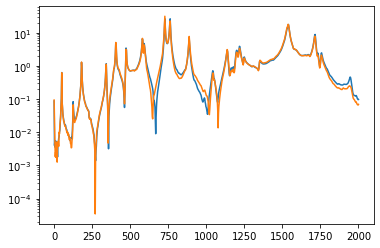

In [19]:
o = 0
i = 1

plt.semilogy(freq, np.abs(Y_exp[:,o,i]))
plt.semilogy(freq, np.abs(FRF_rec[:,o,i]))

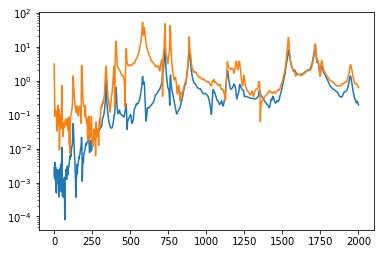

In [20]:
o = 0
i = 0

plt.semilogy(freq, np.abs(Y_exp[:,o,i]))
plt.semilogy(freq, np.abs(FRF_rec[:,o,i]))